           Date          Open          High           Low         Close  \
0    2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1    2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2    2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3    2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4    2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...         ...           ...           ...           ...           ...   
2545 2024-12-20  97484.695312  98098.914062  92175.179688  97755.929688   
2546 2024-12-21  97756.195312  99507.101562  96426.523438  97224.726562   
2547 2024-12-22  97218.320312  97360.265625  94202.187500  95104.937500   
2548 2024-12-23  95099.390625  96416.210938  92403.132812  94686.242188   
2549 2024-12-24  94684.343750  99404.062500  93448.015625  98676.093750   

            Volume  
0      10291200000  
1      16846600192  
2      16871900160  
3      21783199

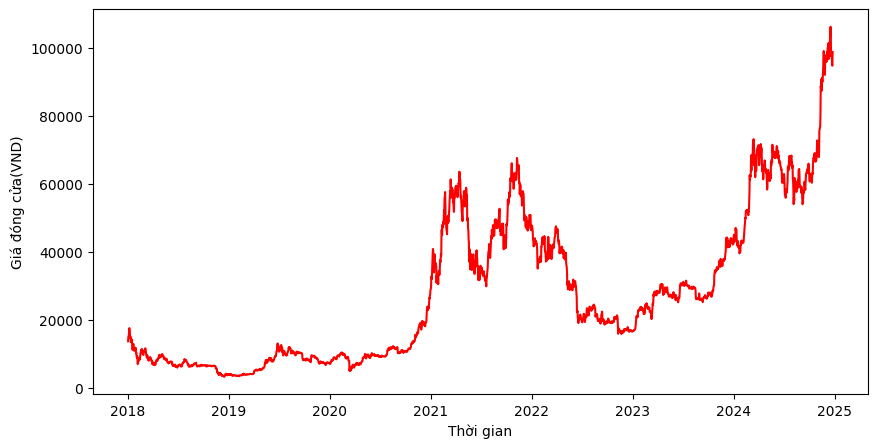

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150

Epoch 1: loss improved from inf to 0.01763, saving model to save_model.keras
19/19 - 7s - 393ms/step - loss: 0.0176
Epoch 2/150

Epoch 2: loss improved from 0.01763 to 0.00901, saving model to save_model.keras
19/19 - 2s - 108ms/step - loss: 0.0090
Epoch 3/150

Epoch 3: loss improved from 0.00901 to 0.00738, saving model to save_model.keras
19/19 - 4s - 204ms/step - loss: 0.0074
Epoch 4/150

Epoch 4: loss improved from 0.00738 to 0.00671, saving model to save_model.keras
19/19 - 3s - 169ms/step - loss: 0.0067
Epoch 5/150

Epoch 5: loss improved from 0.00671 to 0.00664, saving model to save_model.keras
19/19 - 3s - 135ms/step - loss: 0.0066
Epoch 6/150

Epoch 6: loss did not improve from 0.00664
19/19 - 3s - 134ms/step - loss: 0.0068
Epoch 7/150

Epoch 7: loss did not improve from 0.00664
19/19 - 3s - 161ms/step - loss: 0.0079
Epoch 8/150

Epoch 8: loss improved from 0.00664 to 0.00592, saving model to save_model.keras
19/19 - 4s - 196ms/step - loss: 0.0059
Epoch 9/150

Epo

<ipython-input-1-b991ba3e9fe4>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['dự đoán'] = y_train_predict
<ipython-input-1-b991ba3e9fe4>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['dự đoán'] = y_test_predict


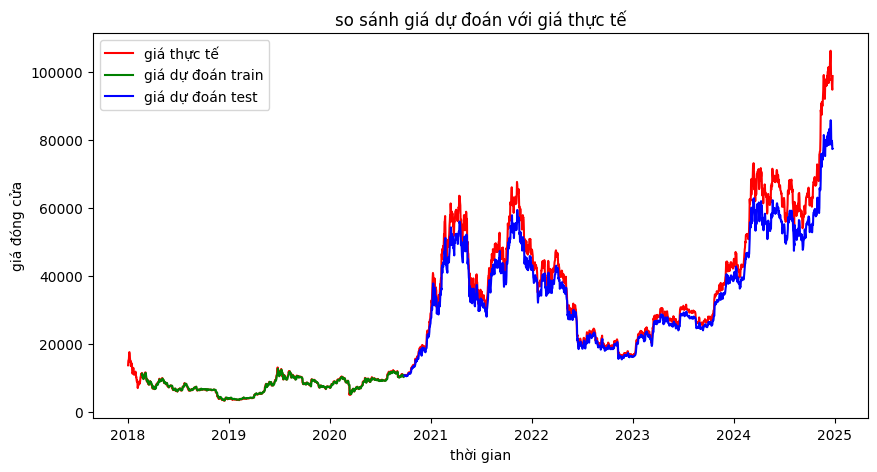

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

from keras.layers import LSTM #model
from keras.layers import Dropout #tránh học tủ(overfit)
from keras.layers import Dense #đầu ra
from keras.models import Sequential
from keras.models import load_model

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# đọc dữ liệu
df = pd.read_csv("/content/btc_data2.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(df)
df1 = pd.DataFrame(df,columns = ['Date','Close'])
df1.index = df1['Date']
df1.drop('Date',axis=1,inplace=True)
plt.figure(figsize=(10,5))
plt.plot(df1['Close'],label = "Giá thực tế",color = 'red')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa(VND)')
plt.legend
plt.show()
#train, tét
data = df1.values
train_data = data[:1000]
test_data = data[1000:]

sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

x_train,y_train = [],[]
for i in range(50,len(train_data)):
    x_train.append(sc_train[i-50:i,0])
    y_train.append(sc_train[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

model = Sequential( )
model.add(LSTM(units=128,input_shape = (x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer = 'adam')

save_model = "save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose = 2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs = 150,batch_size = 50,verbose = 2,callbacks = [best_model])

y_train = sc.inverse_transform(y_train)# giá thực tế / chuẩn hóa ngược lại
final_model = load_model('save_model.keras')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict) # giá dự đoán

test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]) :
    x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test = data[1000:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

train_data = df1[50:1000]
test_data = df1[1000:]

plt.figure(figsize=(10,5))
plt.plot(df1,label= 'giá thực tế',color = 'red')
train_data['dự đoán'] = y_train_predict
plt.plot(train_data['dự đoán'],label = 'giá dự đoán train', color = 'green')
test_data['dự đoán'] = y_test_predict
plt.plot(test_data['dự đoán'],label = 'giá dự đoán test',color = 'blue')
plt.title("so sánh giá dự đoán với giá thực tế")
plt.xlabel('thời gian')
plt.ylabel('giá đóng cửa')
plt.legend()
plt.show()

# các thông số tập train
print("R2 score: ",r2_score(y_train,y_train_predict))
print("sai số tb : ",mean_absolute_error(y_train,y_train_predict))
print("phần trăm sai số tb",mean_absolute_percentage_error(y_train,y_train_predict))
print(train_data)
# các thông số tập test
print("R2 score_test: ",r2_score(y_test,y_test_predict))
print("sai số tb tập test : ",mean_absolute_error(y_test,y_test_predict))
print("phần trăm sai số tb tập test : ",mean_absolute_percentage_error(y_test,y_test_predict))
print(test_data)
# so sánh bộ dữ liệu dự đoán và dữ liệu thực tế



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

Mean Absolute Error (MAE):  24165.003622553035


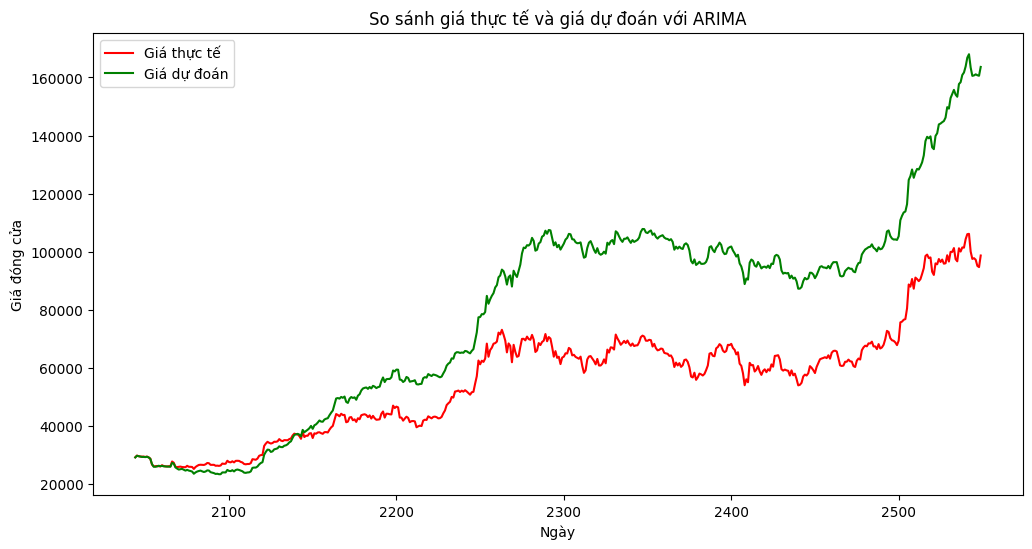

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sửa hàm get_technical_indicators
def get_technical_indicators(dataset):
    # Tạo các Moving Average (MA7 và MA21)
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()

    # Tạo MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema'] - dataset['26ema'])

    # Tạo Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    # Tạo Exponential Moving Average (EMA)
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()

    # Tạo Momentum
    dataset['momentum'] = dataset['Close'].diff(4)
    dataset['log_momentum'] = dataset['momentum'].apply(lambda x: np.log(x) if x > 0 else 0)

    return dataset

# Đọc dữ liệu và tạo các chỉ số kỹ thuật
btc_data = pd.read_csv("/content/btc_data2.csv")
btc_data = get_technical_indicators(btc_data)

# Chọn các cột sử dụng trong mô hình ARIMA
features = ['ma7', 'ma21', 'MACD', 'upper_band', 'lower_band', 'ema', 'momentum', 'log_momentum']
target = ['Close']  # Dự đoán giá đóng cửa

# Lọc các dòng dữ liệu không đầy đủ (NaN)
btc_data = btc_data.dropna(subset=features + target)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data, test_data = train_test_split(btc_data, test_size=0.2, shuffle=False)

# Tạo mô hình ARIMA (ví dụ, với tham số AR=1, I=1, MA=1)
model = ARIMA(train_data['Close'], exog=train_data[features], order=(10, 1, 10))

# Huấn luyện mô hình
model_fit = model.fit()

# Dự đoán giá trị trên tập test
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[features])

# Tính toán sai số
mae = mean_absolute_error(test_data['Close'], predictions)
print("Mean Absolute Error (MAE): ", mae)

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'], label='Giá thực tế', color='red')
plt.plot(test_data.index, predictions, label='Giá dự đoán', color='green')
plt.title('So sánh giá thực tế và giá dự đoán với ARIMA')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 - 10s - 156ms/step - loss: 0.0069 - val_loss: 0.0122
Epoch 2/100
62/62 - 9s - 152ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 3/100
62/62 - 7s - 120ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 4/100
62/62 - 5s - 87ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 5/100
62/62 - 8s - 121ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 6/100
62/62 - 9s - 137ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 7/100
62/62 - 12s - 199ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 8/100
62/62 - 7s - 121ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 9/100
62/62 - 8s - 133ms/step - loss: 0.0013 - val_loss: 0.0043
Epoch 10/100
62/62 - 10s - 164ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 11/100
62/62 - 10s - 163ms/step - loss: 0.0012 - val_loss: 0.0071
Epoch 12/100
62/62 - 12s - 189ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 13/100
62/62 - 11s - 177ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 14/100
62/62 - 5s - 86ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 15/100
62/62 - 12

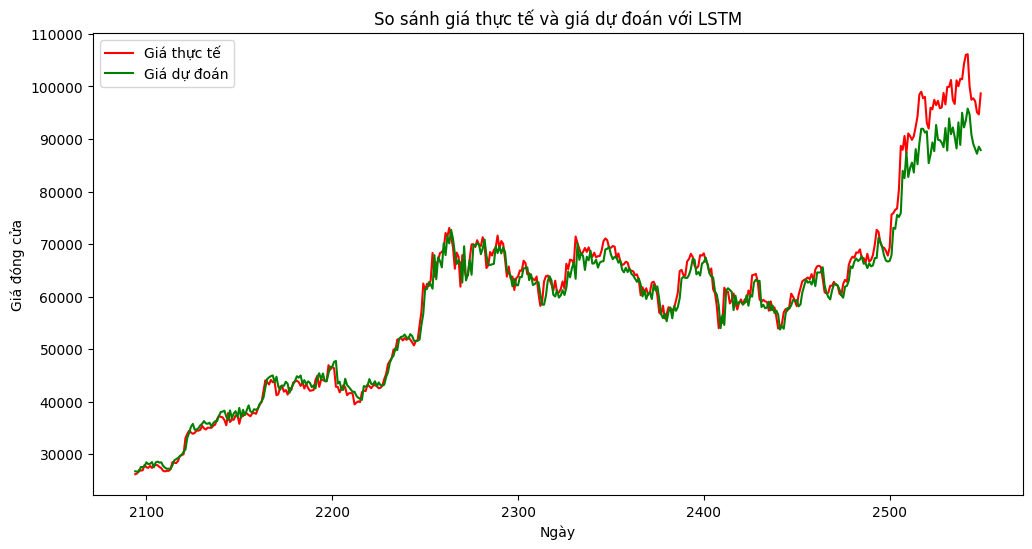

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Sửa hàm get_technical_indicators
def get_technical_indicators(dataset):
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema'] - dataset['26ema'])
    dataset['20sd'] = dataset['Close'].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    dataset['momentum'] = dataset['Close'].diff(4)
    dataset['log_momentum'] = dataset['momentum'].apply(lambda x: np.log(x) if x > 0 else 0)
    return dataset

# Đọc dữ liệu và tạo các chỉ số kỹ thuật
btc_data = pd.read_csv("/content/btc_data2.csv")
btc_data = get_technical_indicators(btc_data)

# Chọn các cột sử dụng trong mô hình LSTM
features = ['ma7', 'ma21', 'MACD', 'upper_band', 'lower_band', 'ema', 'momentum', 'log_momentum']
target = ['Close']

# Lọc các dòng dữ liệu không đầy đủ (NaN)
btc_data = btc_data.dropna(subset=features + target)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data, test_data = train_test_split(btc_data, test_size=0.2, shuffle=False)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[features + target])
test_scaled = scaler.transform(test_data[features + target])

# Chuyển dữ liệu thành dạng (samples, time steps, features)
def create_sequences(data, features, target, time_steps=50):
    x, y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i, :-1])  # Lấy các đặc trưng
        y.append(data[i, -1])  # Lấy giá đóng cửa
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_scaled, features, target)
x_test, y_test = create_sequences(test_scaled, features, target)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.2))  # Thêm Dropout để giảm overfitting
model.add(Dense(1))  # Đầu ra chỉ có một giá trị (giá đóng cửa)
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=2)

# Dự đoán giá trị trên tập test
predictions = model.predict(x_test)

# Chuyển đổi dự đoán về giá thực tế
predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], len(features))), predictions)))

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'][50:], label='Giá thực tế', color='red')
plt.plot(test_data.index[50:], predictions[:, -1], label='Giá dự đoán', color='green')
plt.title('So sánh giá thực tế và giá dự đoán với LSTM')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 1718.277716665943
Mean Squared Error (MSE): 7042704.615807025
Root Mean Squared Error (RMSE): 2653.8094535604896
R-squared (R2): 0.9775321631848835
Mean Absolute Percentage Error (MAPE): 2.618434197279208%


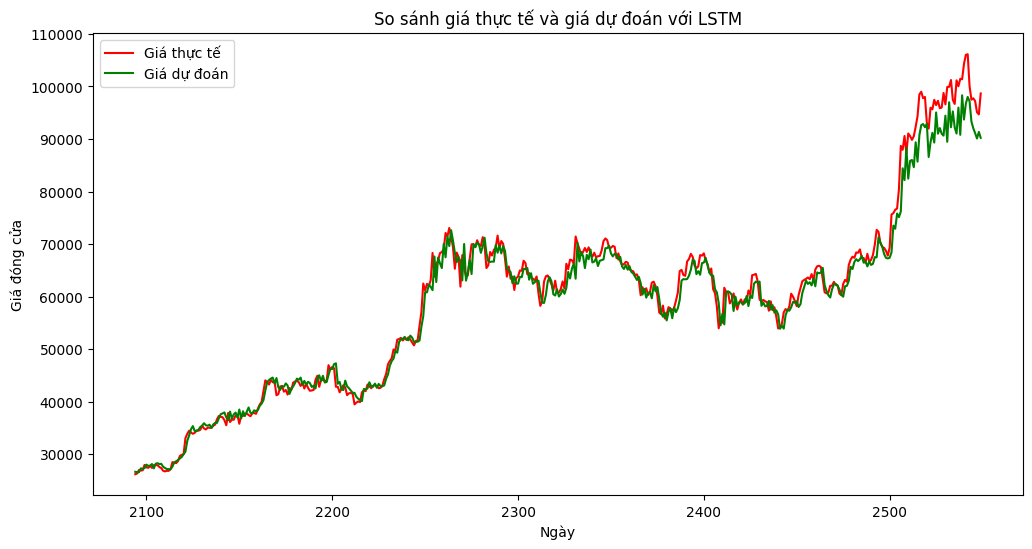

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính các chỉ số so sánh giữa giá trị thực tế và giá trị dự đoán
y_test_actual = test_data['Close'][50:].values  # Giá trị thực tế từ tập test

# Dự đoán đã được chuyển đổi lại về giá trị thực tế
predictions_actual = predictions[:, -1]

# Tính MAE, MSE, RMSE, R2, MAPE
mae = mean_absolute_error(y_test_actual, predictions_actual)
mse = mean_squared_error(y_test_actual, predictions_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions_actual)
mape = np.mean(np.abs((y_test_actual - predictions_actual) / y_test_actual)) * 100

# In kết quả các chỉ số đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Vẽ biểu đồ so sánh giữa giá thực tế và giá dự đoán
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'][50:], label='Giá thực tế', color='red')
plt.plot(test_data.index[50:], predictions_actual, label='Giá dự đoán', color='green')
plt.title('So sánh giá thực tế và giá dự đoán với LSTM')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 128)             │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 358,853 (1.37 MB)

 Trainable params: 119,617 (467.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 239,236 (934.52 KB)